In [4]:
#eghove Eric Hove code, slightly modified.  I could not get seaborn to work as expected.  Added some additional pandas items.
import pandas as pd
import numpy as np

In [5]:
id_train_df = pd.read_csv("train_identity.csv")
tx_train_df = pd.read_csv("train_transaction.csv")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("identity data: ", id_train_df.shape)
print("transaction data: ",tx_train_df.shape)

identity data:  (144233, 41)
transaction data:  (590540, 394)


In [8]:
train_full_df = pd.merge(tx_train_df, id_train_df, on="TransactionID", how="left")

In [9]:
train_full_df.shape

(590540, 434)

In [10]:
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)

0.03499000914417313

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

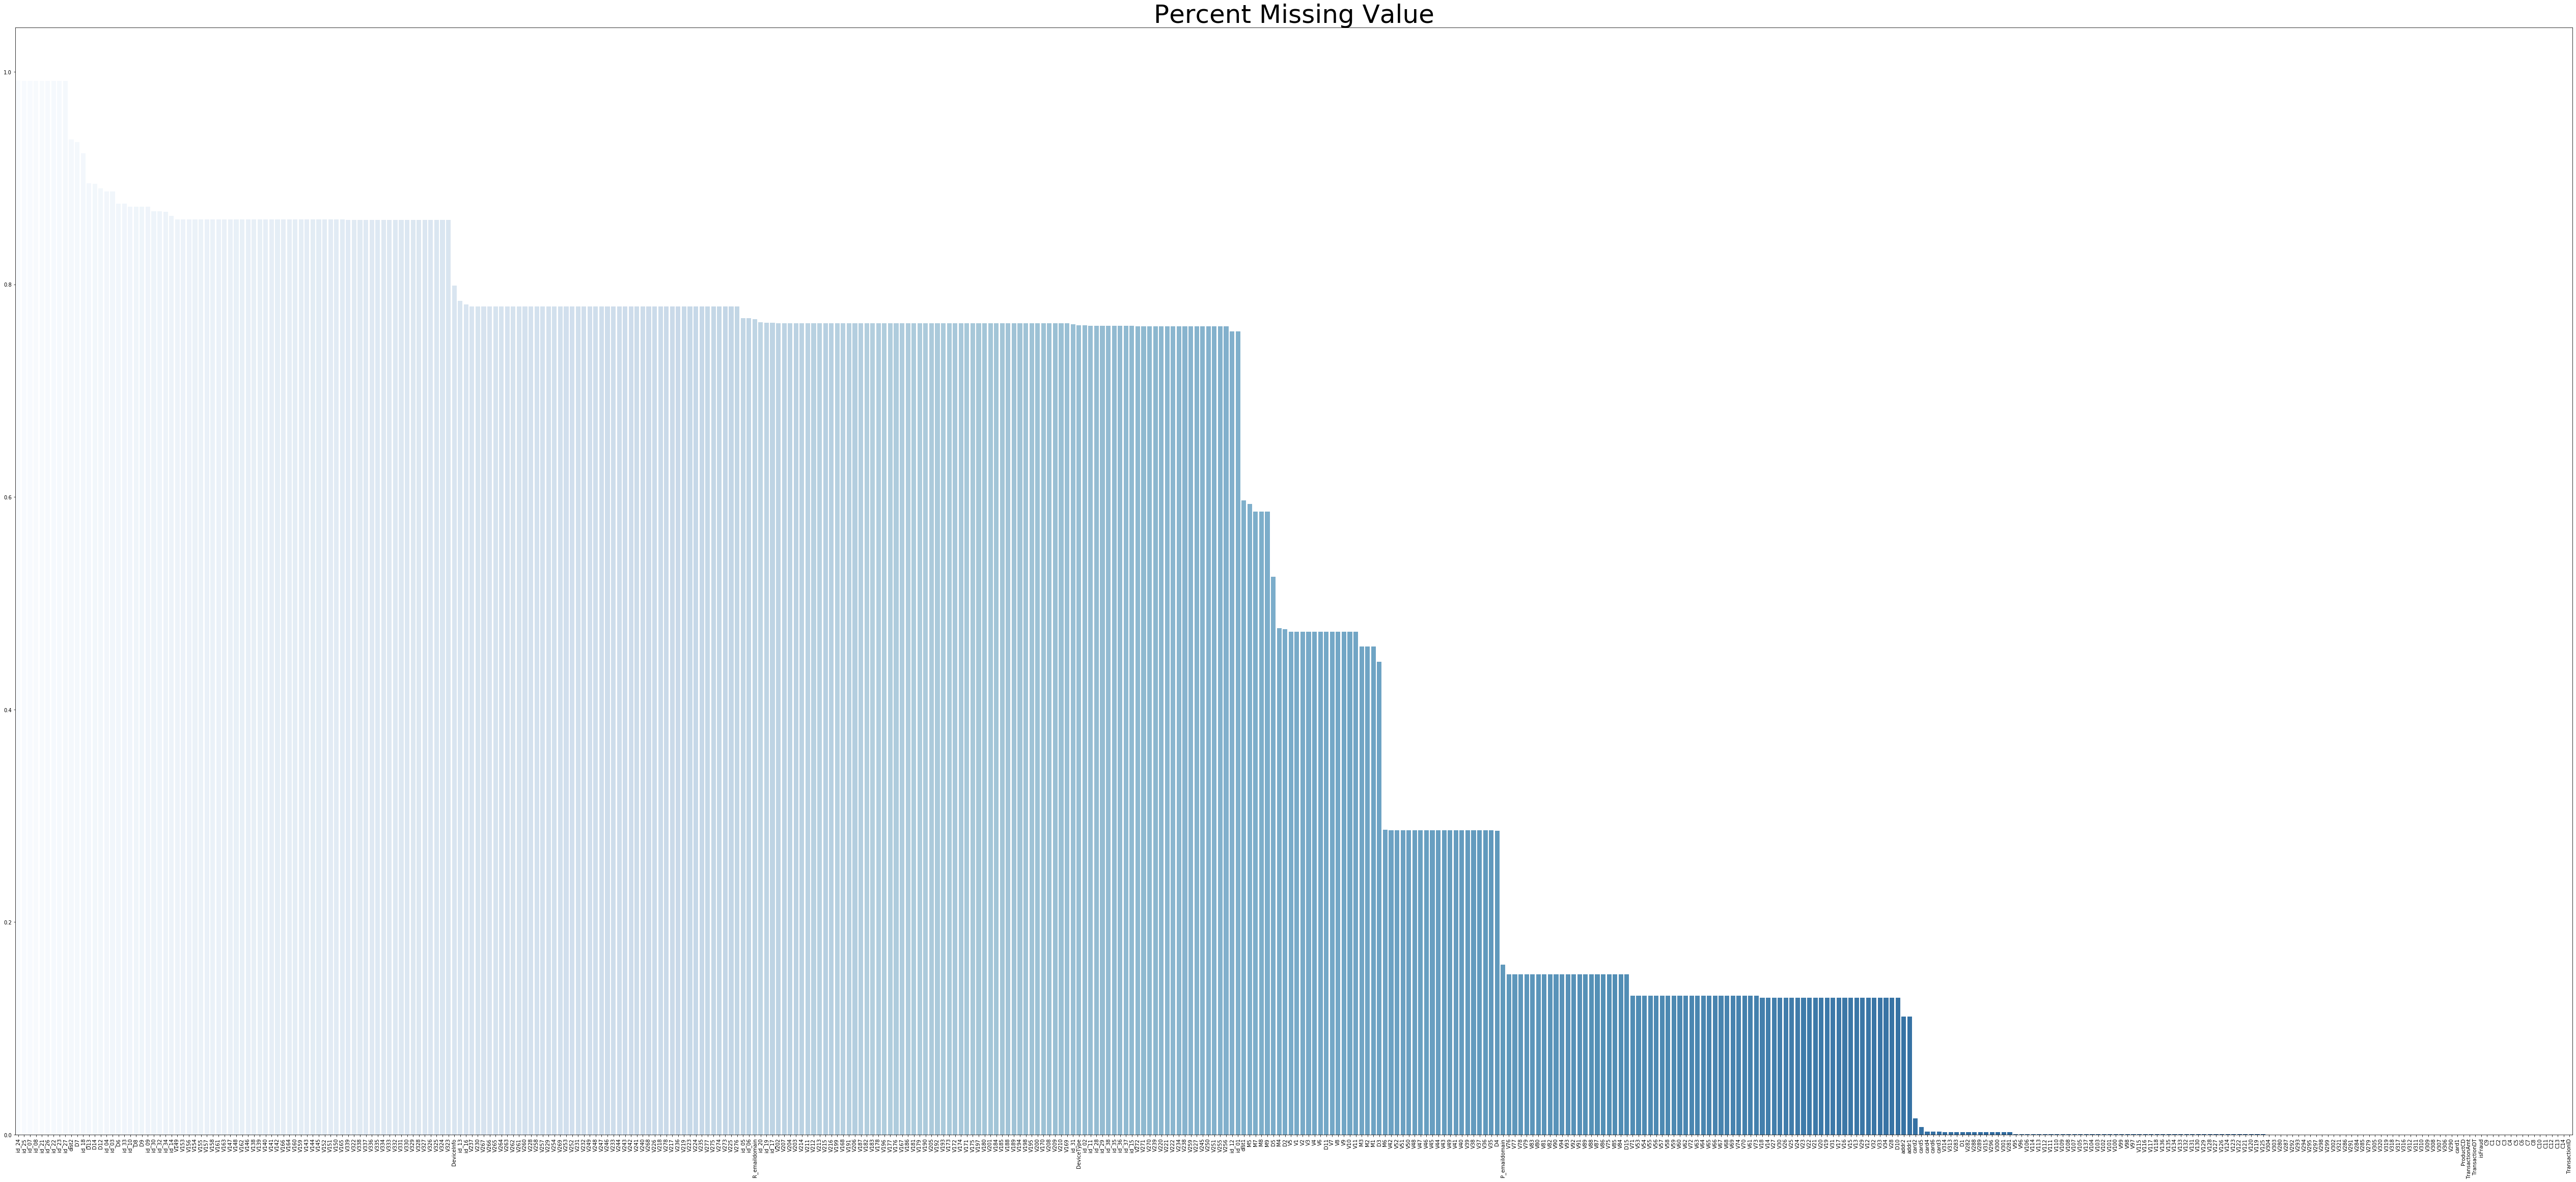

In [13]:
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Blues")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [38]:
count1 = tx_train_df['card4'].count()

In [39]:
count2 = tx_train_df['card4'].value_counts()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
columns_def=pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [16]:
columns_def["per"]=columns_def["na_count"]/len(train_full_df)
columns_def

,na_count,per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
...,...,...
C11,0,0.000000
C12,0,0.000000
C13,0,0.000000
C14,0,0.000000


In [17]:
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [18]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [19]:
limit=0.15

In [20]:
columns_final=columns_def[columns_def["per"]<limit].index 

train_full_df=train_full_df[train_full_df.columns.intersection(columns_final)]

In [21]:
train_full_df.shape

(590540, 160)

In [22]:
train_full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_full_df[train_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
...,...,...,...
590535,W,visa,debit
590536,W,mastercard,debit
590537,W,mastercard,debit
590538,W,mastercard,debit


In [24]:
card6_dummy_df=pd.get_dummies(train_full_df["card6"])

In [25]:
card6_dummy_df

,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
590535,0,0,1,0
590536,0,0,1,0
590537,0,0,1,0
590538,0,0,1,0


In [26]:
train_full_df.shape

(590540, 160)

In [27]:
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [28]:
train_full_df.shape

(590540, 164)

In [29]:
train_full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V316,V317,V318,V319,V320,V321,charge card,credit,debit,debit or credit
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0,1,0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,50.0,1404.0,790.0,0.0,0.0,0.0,0,0,1,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [30]:
train_full_df=train_full_df._get_numeric_data()
train_full_df=train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

2.04579077462003

In [31]:
x_full_df=train_full_df.drop(["isFraud"],axis=1)
y_full_df=train_full_df["isFraud"]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

In [33]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [34]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lr.score(X_test, y_test)

0.9792883307647632

In [36]:
y_pred=lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,214117,66,214183
1,4463,23,4486
All,218580,89,218669


In [37]:
recall_score(y_test, y_pred)

0.0051270619705751225